# Import python packages

In [1]:
from run_sark import SARK

import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import random

np.random.seed(7)

# Define parameters and load bgp_routes and ToR datasets

In [2]:
ToR_MODEL_NAME = "CAIDA_s1_ToR_Classification_SARK"

TEST_SIZE = 0.2
TOR_LABELS_DICT = {'P2P':0, 'C2P': 1,'P2C': 2}
class_names = ['P2P', 'C2P', 'P2C']
DATA_PATH = '../../Data/'
MODELS_PATH = '../../Models/'
RESULTS_PATH = '../../Results/'


bgp_routes = np.load(DATA_PATH + "bgp_routes_dataset.npy")
bgp_routes_labels = np.load(DATA_PATH + "bgp_routes_labels.npy")
print(bgp_routes.shape, bgp_routes_labels.shape)

DATA = "caida_s1_tor"
tor_dataset = np.load(DATA_PATH + DATA + "_dataset.npy")
tor_labels = np.load(DATA_PATH + DATA + "_labels.npy")

print(tor_dataset.shape, tor_labels.shape)

(3669655,) (3669655,)
(580762, 2) (580762,)


# Generate training and test sets
## Shauffle dataset

In [3]:
from sklearn.utils import shuffle
dataset, labels = shuffle(tor_dataset, tor_labels, random_state=7)

## Generate a balanced dataset

In [ ]:
# def generate_balanced_dataset(dataset, labels, labels_set):
#     sets_dict = dict()
#     for label in labels_set:
#         sets_dict[label] = np.asarray([np.asarray(dataset[i]) for i in range(len(dataset)) if labels[i] == label])
    
#     min_set_len = min([len(label_set) for label_set in sets_dict.values()])
    
#     for label, label_set in sets_dict.iteritems():
#         sets_dict[label] = label_set[np.random.choice(label_set.shape[0], min_set_len, replace=False)]
    
#     dataset = np.concatenate((sets_dict.values()))
#     labels = []
#     for label, label_set in sets_dict.iteritems():
#         labels += [label]*len(label_set)
#         print label, len(label_set)
#     labels = np.asarray(labels)
#     return shuffle(dataset, labels, random_state=7)

# dataset, labels = generate_balanced_dataset(dataset, labels, (0,1,3))
# print dataset.shape, labels.shape

## Train Test Split

In [4]:
x_training, x_test, y_training, y_test = train_test_split(dataset, labels, test_size=TEST_SIZE)

del dataset, labels

In [5]:
print(x_training.shape, y_training.shape)
print(x_test.shape, y_test.shape)

# print 1.0*len(x_training)/(len(x_test)+len(x_training))

# from collections import Counter
# training_c = Counter(y_training)
# test_c = Counter(y_test)
# print(training_c, test_c)

(464609, 2) (464609,)
(116153, 2) (116153,)


In [ ]:
# for k,v in training_c.iteritems():
#     print k, 100.0*v/len(x_training)
# print
# for k,v in test_c.iteritems():
#     print k, 100.0*v/len(x_test)

# Run SARK Algorithm

In [ ]:
sark = SARK(bgp_routes)

46
Working on vantage number 0
Start Iteration on 53344 Leaves
Number of remaining edges: 17498
Number of leaves: 5470

Start Iteration on 5470 Leaves
Number of remaining edges: 7825
Number of leaves: 1393

Start Iteration on 1393 Leaves
Number of remaining edges: 4848
Number of leaves: 439

Start Iteration on 439 Leaves
Number of remaining edges: 3843
Number of leaves: 150

Start Iteration on 150 Leaves
Number of remaining edges: 3491
Number of leaves: 35

Start Iteration on 35 Leaves
Number of remaining edges: 3397
Number of leaves: 14

Start Iteration on 14 Leaves
Number of remaining edges: 3362
Number of leaves: 5

Start Iteration on 5 Leaves
Number of remaining edges: 3356
Number of leaves: 1

Start Iteration on 1 Leaves
Number of remaining edges: 3345
Number of leaves: 1

Start Iteration on 1 Leaves
Number of remaining edges: 3341
Number of leaves: 0

Finished __get_ranking_for_vantage_garaph number 0
Working on vantage number 1
Start Iteration on 53579 Leaves
Number of remaining

Start Iteration on 53315 Leaves
Number of remaining edges: 17990
Number of leaves: 5453

Start Iteration on 5453 Leaves
Number of remaining edges: 8315
Number of leaves: 1358

Start Iteration on 1358 Leaves
Number of remaining edges: 5464
Number of leaves: 434

Start Iteration on 434 Leaves
Number of remaining edges: 4480
Number of leaves: 134

Start Iteration on 134 Leaves
Number of remaining edges: 4133
Number of leaves: 31

Start Iteration on 31 Leaves
Number of remaining edges: 4050
Number of leaves: 17

Start Iteration on 17 Leaves
Number of remaining edges: 4000
Number of leaves: 7

Start Iteration on 7 Leaves
Number of remaining edges: 3989
Number of leaves: 3

Start Iteration on 3 Leaves
Number of remaining edges: 3975
Number of leaves: 0

Finished __get_ranking_for_vantage_garaph number 9
Working on vantage number 10
Start Iteration on 53448 Leaves
Number of remaining edges: 17850
Number of leaves: 5482

Start Iteration on 5482 Leaves
Number of remaining edges: 8010
Number of 

In [7]:
with open(MODELS_PATH + ToR_MODEL_NAME + '_tor_dict.pickle', 'wb') as handle:
            pickle.dump(sark.tor_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'sark' is not defined

# Load SARK Results

In [6]:
# OLD_ToR_MODEL_NAME = "Orig_ToR_Classification_SARK"
with open(MODELS_PATH + ToR_MODEL_NAME + '_tor_dict.pickle', 'rb') as handle:
    sark_tor_dict = pickle.load(handle)

# Final evaluation of the model
## Evaluate accuracy over the test set

In [7]:
def generate_labels_for_set(tor_dict, pairs):
    labels = []
    for pair in pairs:
        if (pair[0], pair[1]) in tor_dict:
            labels.append(tor_dict[(pair[0], pair[1])])
        elif (pair[1], pair[0]) in tor_dict:
            if tor_dict[(pair[1], pair[0])] == 0 or tor_dict[(pair[1], pair[0])] == 2:
                labels.append(tor_dict[(pair[1], pair[0])])
            else:
                labels.append((tor_dict[(pair[1], pair[0])] + 2)%4)
        else:
            labels.append(-1)
    return np.asarray(labels)

In [8]:
y_test_prediction = generate_labels_for_set(sark_tor_dict, x_test)

print(len(y_test_prediction))
y_test_prediction_new = []
for i in range(len(y_test_prediction)):
    if y_test_prediction[i] %2 == 0:
        y_test_prediction_new.append(0)
    elif y_test_prediction[i] == 3:
        y_test_prediction_new.append(2)
    elif y_test_prediction[i] == 1:
        y_test_prediction_new.append(1)
    else:
        y_test_prediction_new.append(-1)

y_test_prediction_new = np.asarray(y_test_prediction_new)
print(len(y_test_prediction_new))
y_test_prediction = y_test_prediction_new

116153
116153


In [ ]:
# y_test_prediction = sark.generate_labels_for_set(x_test)

In [9]:
y_test_prediction_eval = y_test_prediction[np.where(y_test_prediction!=-1)]
y_test_eval = y_test[np.where(y_test_prediction!=-1)]

print(len(y_test_prediction_eval))

49550


In [10]:
from sklearn.metrics import accuracy_score
# test_scores = accuracy_score(y_test, y_test_prediction)
# print("Accuracy: %.2f%%" % (test_scores*100))

test_scores = accuracy_score(y_test_eval, y_test_prediction_eval)
print("Accuracy: %.2f%%" % (test_scores*100))

Accuracy: 81.85%


In [ ]:
# x_test_cleaned = np.asarray([np.asarray(x_test[i]) for i in range(len(x_test)) if y_test_prediction[i] != -1])
# y_test_cleaned = np.asarray([y_test[i] for i in range(len(y_test)) if y_test_prediction[i] != -1])
# y_test_prediction_cleaned = np.asarray([y_test_prediction[i] for i in range(len(y_test_prediction)) if y_test_prediction[i] != -1])

In [ ]:
# print(len(x_test_cleaned), len(y_test_cleaned), len(y_test_prediction_cleaned))

In [ ]:
# from sklearn.metrics import accuracy_score
# test_scores = accuracy_score(y_test_cleaned, y_test_prediction_cleaned)
# print("Accuracy: %.2f%%" % (test_scores*100))

## Test if by learning (asn1, asn2) -> p2c then (asn2, asn1) -> c2p and vice versa

In [ ]:
p2c = TOR_ORIG_LABELS_DICT['P2C']
c2p = TOR_ORIG_LABELS_DICT['C2P']

p2c_training = np.asarray([np.asarray(x_training[i]) for i in range(len(x_training)) if y_training[i] == p2c])
p2c_training_oposite = np.asarray([np.asarray([pair[1], pair[0]]) for pair in p2c_training])
p2c_training_labels = [p2c]*len(p2c_training)
p2c_training_oposite_labels = [c2p]*len(p2c_training_oposite)
print(p2c_training.shape, p2c_training_oposite.shape)

In [ ]:
p2c_training_labels_prediction = gao.generate_labels_for_set(p2c_training)
p2c_training_scores = accuracy_score(p2c_training_labels, p2c_training_labels_prediction)
print("Accuracy: %.2f%%" % (p2c_training_scores*100))

p2c_training_oposite_labels_prediction = gao.generate_labels_for_set(p2c_training_oposite)
p2c_training_oposite_scores = accuracy_score(p2c_training_oposite_labels, p2c_training_oposite_labels_prediction)
print("Accuracy: %.2f%%" % (p2c_training_oposite_scores*100))

## Plot and save a confusion matrix for results over the test set

### Define a function

In [11]:
%matplotlib inline

import matplotlib
import pylab as pl
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          fname='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, format(cm[i, j]*100, fmt) + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")    
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(fname, bbox_inches='tight')

Confusion matrix, without normalization
Normalized confusion matrix


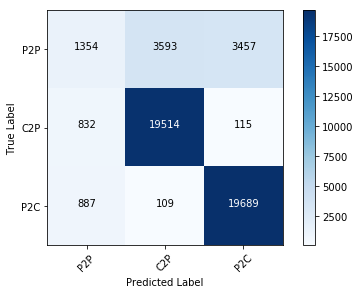

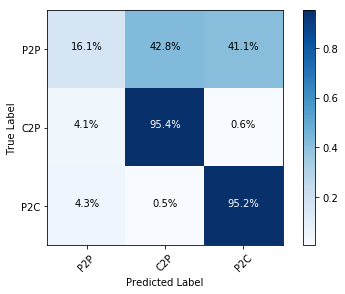

In [12]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_eval, y_test_prediction_eval)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization',
                      fname=RESULTS_PATH + ToR_MODEL_NAME + "_" + 'Confusion_matrix_without_normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Msatrix',
                      fname=RESULTS_PATH +ToR_MODEL_NAME + "_" + 'Normalized_confusion_matrix')

plt.show()

# Export the model to a file

In [ ]:
model_json = pairs_model.to_json()
with open(MODELS_PATH + ToR_MODEL_NAME + '.json', "w") as json_file:
    json_file.write(model_json)
pairs_model.save_weights(MODELS_PATH + ToR_MODEL_NAME + '.h5')
print("Save Model")

# Export results to a csv file (with original ASNs)
## Define functions

In [ ]:
def index2ASN(dataset_indexed, ASN_index_map):
    dataset = []
    index_ASN_map = {index: ASN for ASN, index in ASN_index_map.iteritems()}
    for row_indexed in dataset_indexed:
        row = []
        for index in row_indexed:
            if index != 0:
                row += [index_ASN_map[index]]
        dataset.append(row)
    
    return dataset

def index2ASN_labeled(dataset_indexed, labels_indexed, ASN_index_map):
    dataset = []
    index_ASN_map = {index: ASN for ASN, index in ASN_index_map.iteritems()}
    labels_colors_map = {0:'GREEN', 1:'RED'}
    
    for i, row_indexed in enumerate(dataset_indexed):
        row = []
        for index in row_indexed:
            if index != 0:
                row += [index_ASN_map[index]]
        row += [labels_colors_map[labels_indexed[i]]]
        dataset.append(row)
    
    return dataset

import csv
def export_csv(dataset, csv_name):
    with open(csv_name + '.csv', 'wb') as csv_file:
        csv_writer = csv.writer(csv_file)
        for row in dataset:
            csv_writer.writerow(row)

## Load a relevant dataset {all, misclassified, decided, undecided} and get model predictions

In [ ]:
### misclassified from the entire dataset ###

dataset = np.load(DATA_PATH + "bgp_routes_indexed_dataset.npy")
labels = np.load(DATA_PATH + "bgp_routes_labels.npy")

# remove UNDECIDED
dataset = np.asarray([np.asarray(dataset[i]) for i in range(len(dataset)) if labels[i] != 2])
labels = np.asarray([labels[i] for i in range(len(labels)) if labels[i] != 2])

# pad sequences
dataset = sequence.pad_sequences(dataset, maxlen=max_len)
# Get Model Predictions
predictions = model.predict_classes(dataset, verbose=1)

In [ ]:
# Create misclassified dataset
x_misclassified = np.asarray([route for i,route in enumerate(dataset) if labels[i] != predictions[i]])
y_misclassified_prediction = np.asarray([label for i,label in enumerate(predictions) if labels[i] != predictions[i]])
print len(x_misclassified), len(y_misclassified_prediction)

## Export Results

In [ ]:
dataset_misclassified = index2ASN_labeled(x_misclassified, y_misclassified_prediction, ASN_index_map)
export_csv(dataset_misclassified, RESULTS_PATH + MODEL_NAME + "_misclassified")